# KPI Forecasting

## Initial reading

Great book about forecasting: <a href= https://otexts.com/fpp2/> link</a>
Trend, seasonality and cycles : https://otexts.com/fpp2/tspatterns.html#tspatterns

Good article about time-series forecasting: <a href="https://towardsdatascience.com/an-overview-of-time-series-forecasting-models-a2fa7a358fcb">link</a>


Time series analysis with pandas: <a href="https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/#">link</a> 

Time series example using Prophet: <a href=
https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a>link</a>

## Data clean-up

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(16, 8)})

In [2]:
df = pd.read_excel('data_kpi_forecasting.xlsx')

Lets see how the data looks like after import.

In [3]:
df.shape

(1056, 1)

In [4]:
df.head()

,time;kpi
0,2020-08-10 00:00;306
1,2020-08-10 00:15;315
2,2020-08-10 00:30;301
3,2020-08-10 00:45;266
4,2020-08-10 01:00;314


Lets check the data types:

In [5]:
df[['time','kpi']] =df['time;kpi'].str.split(';', 1, expand=True)
df = df.drop(columns=['time;kpi'])

In [6]:
df.shape

(1056, 2)

In [7]:
df.dtypes

time    object
kpi     object
dtype: object

Unfortunatelly both of the columns are in object type, ideally the **time should have a type DateTime** and the **kpi should have the type int**

In [8]:
df.head()

,time,kpi
0,2020-08-10 00:00,306
1,2020-08-10 00:15,315
2,2020-08-10 00:30,301
3,2020-08-10 00:45,266
4,2020-08-10 01:00,314


**Convert the time column to DateTime object**

In [9]:
df['time'] = pd.to_datetime(df['time'])

**Check the NaN values in the kPI columns**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1056 non-null   datetime64[ns]
 1   kpi     1056 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 16.6+ KB


In [13]:
df.head()

,time,kpi
0,2020-08-10 00:00:00,306
1,2020-08-10 00:15:00,315
2,2020-08-10 00:30:00,301
3,2020-08-10 00:45:00,266
4,2020-08-10 01:00:00,314


Now that the **time column** is the correct data type, let’s **set it as the DataFrame’s index**.

In [14]:
df = df.set_index('time')
df.head()

,kpi
time,
2020-08-10 00:00:00,306
2020-08-10 00:15:00,315
2020-08-10 00:30:00,301
2020-08-10 00:45:00,266
2020-08-10 01:00:00,314


**Convert the kpi column to float**

In [20]:
df=df.astype(float)

In [12]:
df.dtypes

time    datetime64[ns]
kpi             object
dtype: object

Handle NaN Kpi values:

In [15]:
df[df['kpi'] == 'NaN']

,kpi
time,
2020-08-10 04:30:00,NaN
2020-08-10 06:00:00,NaN
2020-08-11 00:30:00,NaN
2020-08-11 00:45:00,NaN
2020-08-11 01:00:00,NaN
2020-08-11 21:15:00,NaN
2020-08-11 21:30:00,NaN
2020-08-12 05:00:00,NaN
2020-08-12 07:45:00,NaN


In [16]:
print(df.loc['2020-08-10 04:15:00'])
print(df.loc['2020-08-10 04:30:00'])
print(df.loc['2020-08-10 04:45:00'])

kpi    145
Name: 2020-08-10 04:15:00, dtype: object
kpi    NaN
Name: 2020-08-10 04:30:00, dtype: object
kpi    138
Name: 2020-08-10 04:45:00, dtype: object


Plot the timeseries to see the missing values

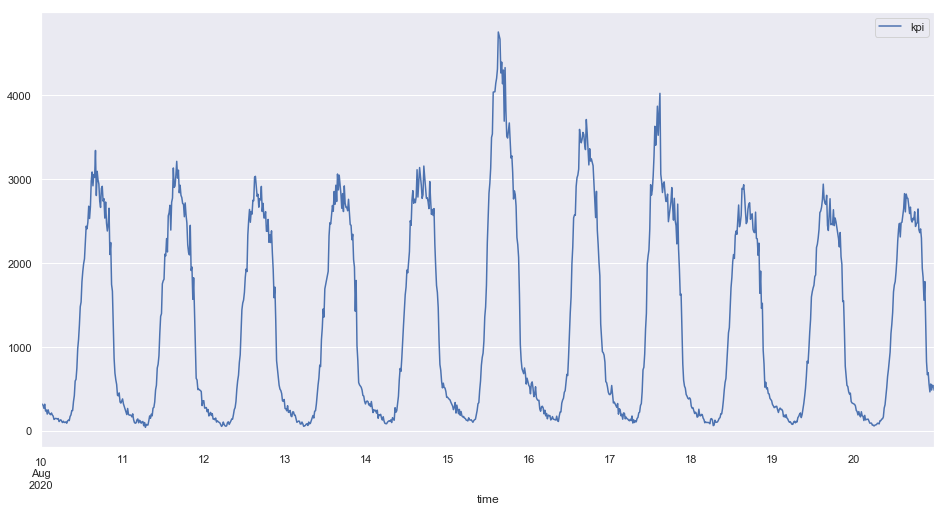

In [25]:
df.plot()

Fill NaN values with interpolation

In [21]:
df.kpi = df.kpi.interpolate()

In [22]:
print(df.loc['2020-08-10 04:15:00'])
print(df.loc['2020-08-10 04:30:00'])
print(df.loc['2020-08-10 04:45:00'])

kpi    145.0
Name: 2020-08-10 04:15:00, dtype: float64
kpi    141.5
Name: 2020-08-10 04:30:00, dtype: float64
kpi    138.0
Name: 2020-08-10 04:45:00, dtype: float64


Plot the kpi values after filling out the missing values with interpolation

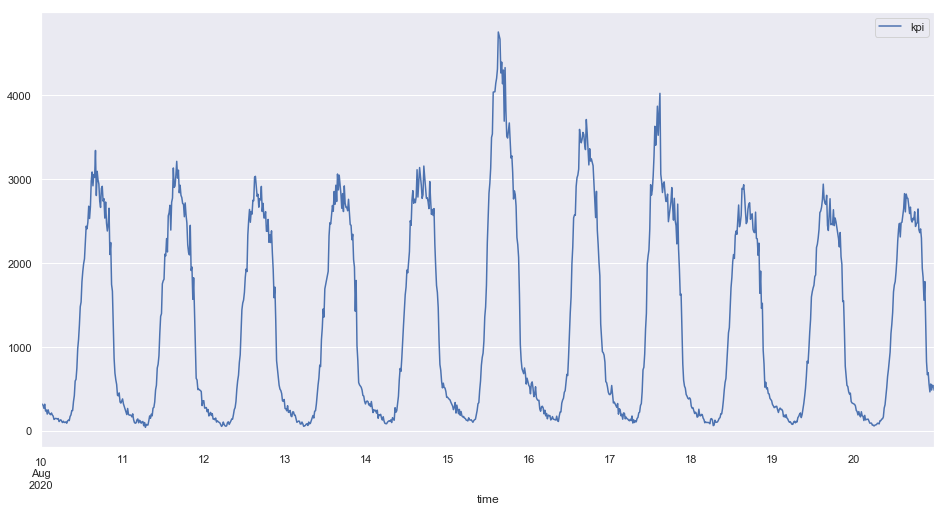

In [26]:
df.plot()

## Exploratory Data Analysis

Plot the timeseries out using seaborn

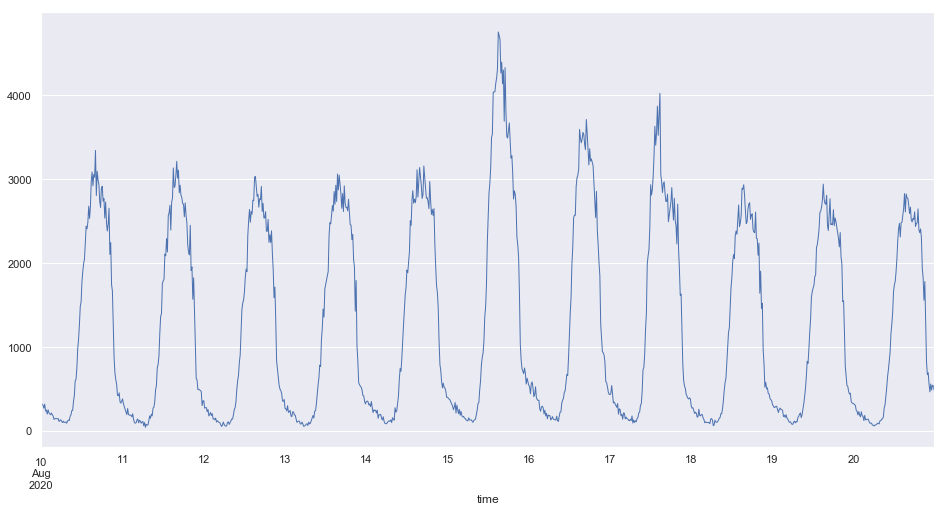

In [27]:
df['kpi'].plot(linewidth=1);

## Time Series decomposition

Time series data can exhibit a variety of patterns, and it is often helpful to split a time series into several components, each representing an underlying pattern category.

When we decompose a time series into components, we usually combine the trend and cycle into a single trend-cycle component (sometimes called the trend for simplicity). Thus we think of a time series as comprising three components: a trend-cycle component, a seasonal component, and a remainder component (containing anything else in the time series).

Use common methods for extracting these components from a time series. Often this is done to help improve understanding of the time series, but it can also be used to improve forecast accuracy.

### Seasonality

Can we see any seasonality?
The KPI value tend to reach higher values on weekend.
One interesting thing is 18th Monday, the max values reach higher values, compared to 10th of August..

In [28]:
#Using the following link to get the day names: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html
df.index.day_name()

Index(['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday',
       ...
       'Thursday', 'Thursday', 'Thursday', 'Thursday', 'Thursday', 'Thursday',
       'Thursday', 'Thursday', 'Thursday', 'Thursday'],
      dtype='object', name='time', length=1056)

In [29]:
df['Weekday Name'] = df.index.day_name()
df.head()

,kpi,Weekday Name
time,,
2020-08-10 00:00:00,306.0,Monday
2020-08-10 00:15:00,315.0,Monday
2020-08-10 00:30:00,301.0,Monday
2020-08-10 00:45:00,266.0,Monday
2020-08-10 01:00:00,314.0,Monday


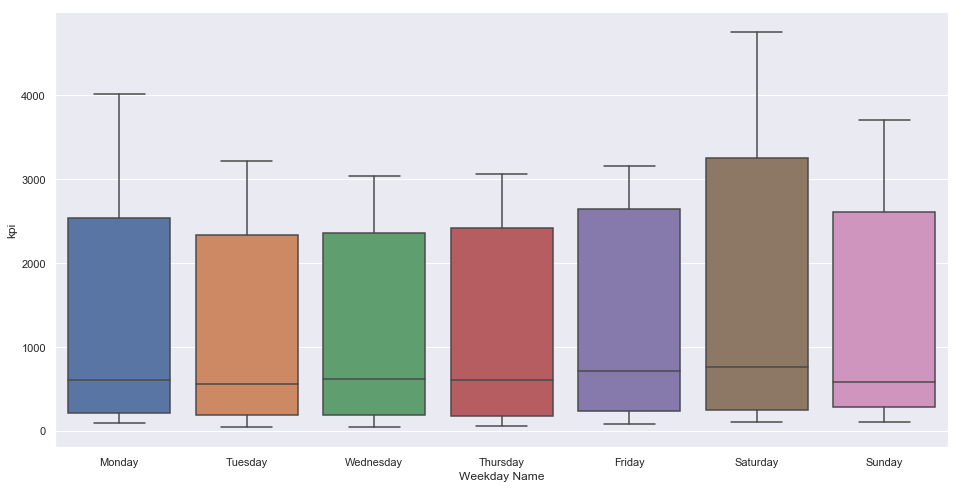

In [30]:
sns.boxplot(data=df, x ='Weekday Name', y ='kpi')

Good to know: 
Applying a rolling window to the data can also help to visualize seasonality on different time scales.
Other techniques for analyzing seasonality include autocorrelation plots, which plot the <a href="https://pandas.pydata.org/pandas-docs/stable/visualization.html#autocorrelation-plot">correlation coefficients</a> of the time series with itself at different time lags.

Time series with strong seasonality can often be well represented with models that decompose the signal into seasonality and a long-term trend, and these models can be used to forecast future values of the time series. A simple example of such a model is classical seasonal decomposition, as demonstrated in <a href=https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/>this</a> tutorial. A more sophisticated example is as Facebook’s Prophet model, which uses curve fitting to decompose the time series, taking into account seasonality on multiple time scales, holiday effects, abrupt changepoints, and long-term trends, as demonstrated in <a href= https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a>this</a> tutorial.

More questions regarding Data Analysis:
- Do we see any trend? No, not really
- Do we see any cycles? No, since we don't have that much amount of Data

**Many time series include trend, cycles and seasonality. When choosing a forecasting method, we will first need to identify the time series patterns in the data, and then choose a method that is able to capture the patterns properly.**

### Frequencies

In [31]:
df.index

DatetimeIndex(['2020-08-10 00:00:00', '2020-08-10 00:15:00',
               '2020-08-10 00:30:00', '2020-08-10 00:45:00',
               '2020-08-10 01:00:00', '2020-08-10 01:15:00',
               '2020-08-10 01:30:00', '2020-08-10 01:45:00',
               '2020-08-10 02:00:00', '2020-08-10 02:15:00',
               ...
               '2020-08-20 21:30:00', '2020-08-20 21:45:00',
               '2020-08-20 22:00:00', '2020-08-20 22:15:00',
               '2020-08-20 22:30:00', '2020-08-20 22:45:00',
               '2020-08-20 23:00:00', '2020-08-20 23:15:00',
               '2020-08-20 23:30:00', '2020-08-20 23:45:00'],
              dtype='datetime64[ns]', name='time', length=1056, freq=None)

Using downsampling to convert to hourly frequencies to smooth the curve. The Hourly curve is smoother because higher frequency variability has been averaged out in the resampling

In [32]:
df_hourly = df.asfreq('H')

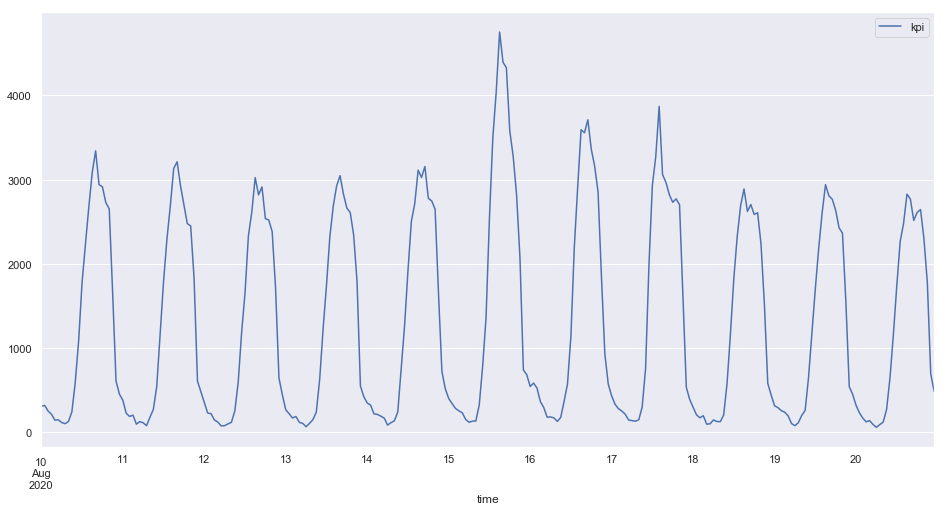

In [33]:
df_hourly.plot()

Idea: Train and test with the hourly time series

### Rolling window

Using 6 hours rolling windows.

In [34]:
df_6h = df['kpi'].rolling(24,center=True).mean()
df_6h.head()

time
2020-08-10 00:00:00   NaN
2020-08-10 00:15:00   NaN
2020-08-10 00:30:00   NaN
2020-08-10 00:45:00   NaN
2020-08-10 01:00:00   NaN
Name: kpi, dtype: float64

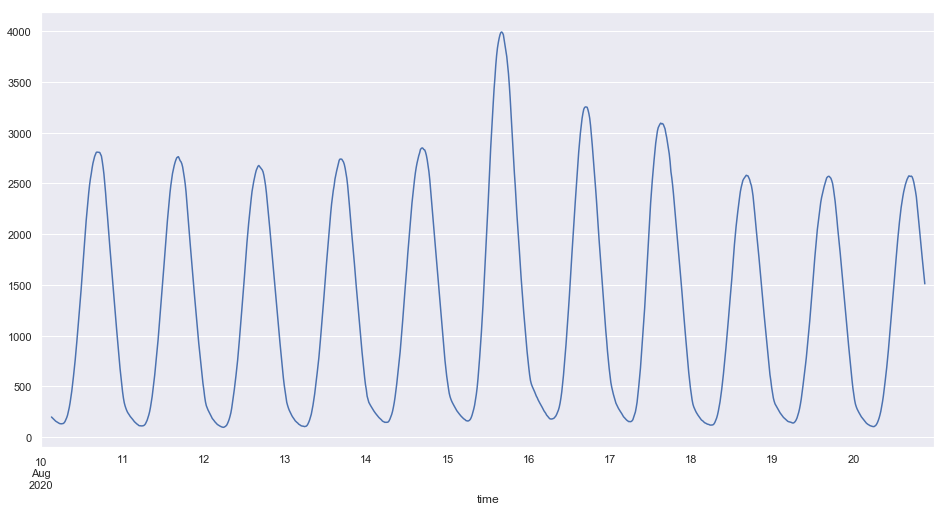

In [35]:
df_6h.plot()

We can see that data points in the rolling mean time series have the same spacing as the daily data, but the curve is smoother because higher frequency variability has been averaged out.

### Trends

Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with rolling means at different time scales.

A rolling mean tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. This allows lower-frequency variations in the data to be explored. Since our electricity consumption time series has weekly and yearly seasonality, let’s look at rolling means on those two time scales.

In [36]:
df_3_5d = df['kpi'].rolling(window=336, center=True, min_periods = 336).mean()

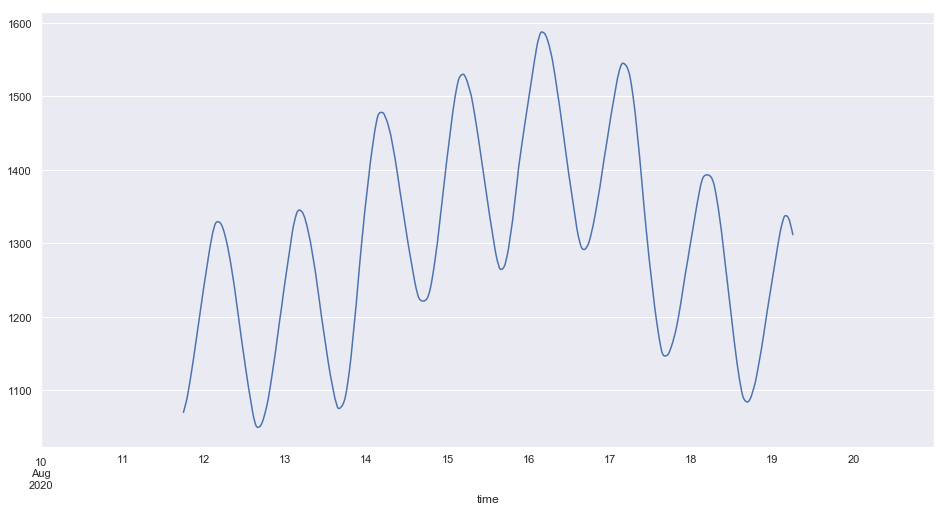

In [37]:
df_3_5d.plot()

## Modelling

The selection of the method is generally based on recognising key components of the time series (trend and seasonal) and the way in which these enter the smoothing method (e.g., in an additive, damped or multiplicative manner).

Split data into training and test set, first 8 days should be training data, last 3 should be test data

In [105]:
df.head()

,kpi
time,
2020-08-10 00:00:00,306
2020-08-10 00:15:00,315
2020-08-10 00:30:00,301
2020-08-10 00:45:00,266
2020-08-10 01:00:00,314


In [106]:
df.tail()

,kpi
time,
2020-08-20 22:45:00,555
2020-08-20 23:00:00,483
2020-08-20 23:15:00,540
2020-08-20 23:30:00,535
2020-08-20 23:45:00,480


Select the first 8 days for training using **partial-string indexing**

In [108]:
df_train = df.loc['2020-08-10':'2020-08-17']
df_train

,kpi
time,
2020-08-10 00:00:00,306
2020-08-10 00:15:00,315
2020-08-10 00:30:00,301
2020-08-10 00:45:00,266
2020-08-10 01:00:00,314
...,...
2020-08-17 22:45:00,410
2020-08-17 23:00:00,385
2020-08-17 23:15:00,376


Select the last 3 days for testing using **partial-string indexing**

In [109]:
df_test = df.loc['2020-08-18':'2020-08-20']
df_test

,kpi
time,
2020-08-18 00:00:00,292
2020-08-18 00:15:00,267
2020-08-18 00:30:00,272
2020-08-18 00:45:00,237
2020-08-18 01:00:00,203
...,...
2020-08-20 22:45:00,555
2020-08-20 23:00:00,483
2020-08-20 23:15:00,540


## Validation

How to validate and test a time series model?
Due to the temporal dependencies in time series data, we cannot rely on usual validation techniques. To avoid biased evaluations we must ensure that training sets contains observations that occurred prior to the ones in validation sets.

A possible way to overcome this problem is to use a sliding window, as described here. This procedure is called time series cross validation and it is summarised in the following picture, in which the blue points represents the training sets in each “fold” and the red points represent the corresponding validation sets.

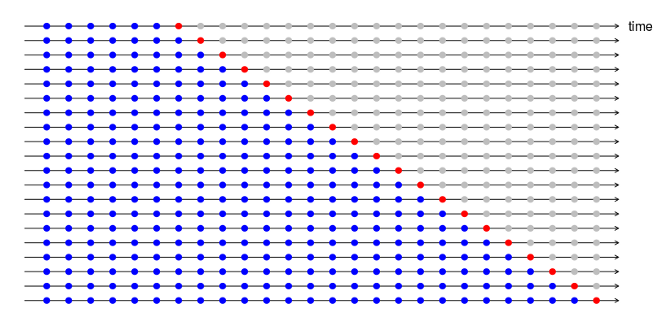

If we are interested in forecasting the next n time steps, we can apply the cross validation procedure for 1,2,…,n steps ahead. In this way we can also compare the goodness of the forecasts for different time horizons.

Once we have chosen the best model, we can fit it on the entire training set and evaluate its performance on a separate test set subsequent in time. The performance estimate can be done by using the same sliding window technique used for cross validation, but without re-estimating the model parameters.